# ROC Curves

The ROC (Receiver Operating Characteristic) curve or ROC curve is a plot with the True Positive Rate (Sensitivity) on the y-axis, and the False Positive Rate (1 - Specificity) on the x-axis.

---
per Wiki:
A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.

-----

The 'ideal' decision boundary provided by logistic regression is the boundary at which the probability of binary classes are even (i.e. P(A) == P(A') )

We can modulate the threshold for acceptance if we want a higher or lower True Positive Rate, traded off for a higher or lower False Positive Rate.


In [78]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Heart Disease


The following dataset is a set of data from the UCI data storage. Patients who visited Cleveland hospitals had 76 attributes about them collected, as well as the number of heart diseases they had.

Typically, only 14 of the attributes have been used for learning, and rather than predicting how many heart diseases a patient has, we will look at the presence or absence of heart disease.



[UCI Heart Disease Link](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

In [80]:
features = ["age","sex","cp","trestbps","chol","fbs",
           "restecg","thatlach","exang","oldpeak","slope",
           "ca","thal","num"]
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",names=features  )

In [17]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thatlach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [29]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thatlach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [32]:
#looks like issues with ca and thal columns. let's remove them for now
data = data.drop(['ca','thal'],axis=1)

In [33]:
# Any heart disease amount greater > 0, we'll set to 1.
# This way we have a binary class for "disease" and "no disease"
data.ix[ data.num > 0, 'num'] = 1

In [34]:
# Create our data
X = data.ix[:,:-1]
y = data.num

In [45]:
model = linear_model.LogisticRegression()

In [46]:
# Let's first use cross validation to see how well it does on average
from sklearn.cross_validation import cross_val_score
cv_scores = cross_val_score(model,X,y,cv=10)
cv_scores.mean()

0.77899517982944011

Remember that we can not only output our predictions, but we can also predict the probabilities for those predictions

In [84]:
model.fit(X,y)
y_pred  = model.predict(X)
y_pred_prob = model.predict_proba(X)

print y_pred
print y_pred_prob

[0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1
 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0
 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1
 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0
 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0
 1 1 0 1 1 0 0]
[[ 0.58681065  0.41318935]
 [ 0.02029305  0.97970695]
 [ 0.04515051  0.95484949]
 [ 0.53968083  0.46031917]
 [ 0.93896818  0.06103182]
 [ 0.90507489  0.09492511]
 [ 0.36556866  0.63443134]
 [ 0.67571995  0.32428005]
 [ 0.24657859  0.75342141]
 [ 0.07372865  0.92627135]
 [ 0.49291996  0.50708004]
 [ 0.83688749  0.16311251]
 [ 0.25807334  0.74192666]
 [ 0.91330213  0.08669787]
 [ 0.6

## Thought Exercise

We are predicting the number of heart diseases based on the patients' other characteristics such as cholesterol, age, etc. 

-------
### Cheap Drugs
- What if we had very cheap medication that we could give patients when we predict they might have a heart condition?

- In that case, we would ideally want to predict "Heart Disease" when we get a **lower** probability of heart disease. Say, instead of 50% being the demarcation, we predict "Heart Disease" when they have a 40% chance of having it.

- What might be the result? We might have both a **higher** True Positive Rate, as well as a **higher** False Positive Rate (think about why)
--------
### Very Expensive Drugs
- On the other hand, imagine patients with heart disease could only be cured with an extremely expensive and invasive procedure.

- In that case, we would ideally want to predict "Heart Disease" when we get a **higher** probability of heart disease. Say, instead of 50% being the demarcation, we predict "Heart Disease" when they have a 60% chance of having it.

- What might be the result? We might have both a **lower** True Positive Rate, as well as a **lower** False Positive Rate (think about why)


We changed our TPR and FPR by modulating the threshold of acceptance for predictions. 

We can plot out this curve through the `roc_curve` method within `sklearn.metrics`

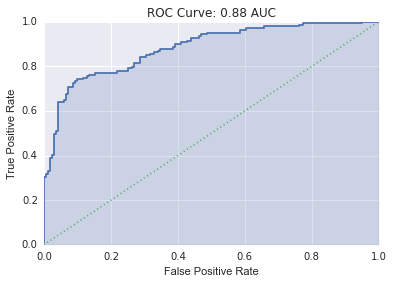

In [99]:
# We are going to pass in the true y, as well as the predicted *PROBABILITIES*
fpr, tpr, thresholds = metrics.roc_curve(y, y_pred_prob[:,1])
roc_auc = metrics.roc_auc_score(y,y_pred_prob[:,1]) 
plt.plot(fpr,tpr)
plt.plot(np.linspace(0,1,1000),np.linspace(0,1,1000),":")
plt.fill_between(fpr,tpr,0,alpha=.2)
plt.xlabel("False Positive Rate"), plt.ylabel("True Positive Rate")
plt.title("ROC Curve: %.2f AUC" % roc_auc )


Starting from the top left, we have a threshold of 0. All of our predictions are "YES HEART DISEASE". Therefore, we are never wrong when they do have it (100% True Positive Rate), but we're mostly wrong when they don't have it (100% False Positive Rate)

At the bottom right, we have our threshold of 1.0. All of our predictions are "nope, go home you're fine." Therefore, we are always wrong when they do have heart issues (0% True Positive Rate), but we're never wrong when they don't have it (0% False Positive Rate)

The curve traces out this path. Ideally, with a perfect model, we would have a point on the top left corner with 100% TPR and 0% FPR. Very good binary classification models have steep slopes in the beginning of the curve.


----
The dotted line represents when TPR == FPR. Models with curves above this line imply models better than random, while lines below the line imply models worse than random choice. 


The AUC (Area Under Curve) is the integral of the ROC curve. It can be used as a rough comparison measure when comparing multiple classifiers. An AUC implies a perfect model (i.e. the integral == 1 across the entire curve). In addition, AUC is a better metric than Accuracy for imbalanced classes. 

-----


## Additional Metrics / Reports

It turns out the ROC curve was originally developed by electrical engineers during World War 2 for detecting enemy objects on radar screens (Makes sense why they care about TPR and FPR).

A few more Metrics to help you diagnose issues:

In [101]:
# Confusion Matrix
metrics.confusion_matrix(y,y_pred)

array([[143,  21],
       [ 35, 104]])

In [100]:
# Classification Stats
print metrics.classification_report(y,y_pred,target_names=["No HD","HD"])

             precision    recall  f1-score   support

      No HD       0.80      0.87      0.84       164
         HD       0.83      0.75      0.79       139

avg / total       0.82      0.82      0.81       303

